In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import pandas as pd
import numpy as np
##paquetes graficos
from PIL import Image
from wordcloud import WordCloud##tiene una funcionalidad interesante para ver palabras mas repetidas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import init_notebook_mode##para usar plotly online
init_notebook_mode(connected=True)

In [4]:
companies = pd.read_csv('companies_an.csv')

In [5]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15916 entries, 0 to 15915
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           15916 non-null  int64  
 1   company_name         15916 non-null  object 
 2   address1             13630 non-null  object 
 3   address2             6472 non-null   object 
 4   city                 15196 non-null  object 
 5   state_code           9562 non-null   object 
 6   country_code         15916 non-null  object 
 7   latitude             10349 non-null  float64
 8   longitude            10349 non-null  float64
 9   name                 15916 non-null  object 
 10  category_code        15219 non-null  object 
 11  number_of_employees  9097 non-null   float64
 12  total_money_raised   15916 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.6+ MB


In [4]:
companies['country_code'].value_counts()

USA    9752
GBR    1321
CAN     595
IND     497
DEU     388
       ... 
BFA       1
PST       1
UMI       1
GIN       1
ECU       1
Name: country_code, Length: 114, dtype: int64

In [6]:
companies_usa = companies[companies['country_code']=='USA']

In [6]:
companies_usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9752 entries, 0 to 15915
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           9752 non-null   int64  
 1   company_name         9752 non-null   object 
 2   address1             8354 non-null   object 
 3   address2             4019 non-null   object 
 4   city                 9394 non-null   object 
 5   state_code           9513 non-null   object 
 6   country_code         9752 non-null   object 
 7   latitude             7250 non-null   float64
 8   longitude            7250 non-null   float64
 9   name                 9752 non-null   object 
 10  category_code        9276 non-null   object 
 11  number_of_employees  5048 non-null   float64
 12  total_money_raised   9752 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.0+ MB


In [7]:
companies_usa['state_code'].value_counts()

CA    3710
NY    1034
MA     600
TX     481
WA     402
FL     327
IL     294
VA     244
PA     217
CO     208
NJ     197
GA     194
MD     134
NC     132
AZ     128
OR     102
OH      96
MN      93
MI      93
UT      78
DC      77
CT      63
TN      54
MO      52
NV      51
WI      45
IN      44
NH      37
SC      30
NE      28
KY      27
DE      26
KS      23
AL      23
OK      20
NM      17
VT      17
IA      17
ID      16
ME      16
RI      12
HI      12
AR      11
LA      10
MT       7
WY       4
MS       3
ND       3
WV       3
SD       1
Name: state_code, dtype: int64

In [7]:
companies_usa['category_code'].value_counts()

web                 1886
software            1658
advertising          625
games_video          567
enterprise           538
other                515
mobile               504
consulting           377
network_hosting      349
ecommerce            345
biotech              274
public_relations     269
hardware             256
cleantech            222
search               189
security             127
semiconductor        111
analytics             62
news                  42
finance               41
legal                 39
social                38
education             32
music                 29
messaging             27
medical               24
health                21
photo_video           19
travel                16
manufacturing         16
sports                10
transportation         9
fashion                7
real_estate            7
hospitality            7
automotive             7
nanotech               5
design                 3
nonprofit              3
Name: category_code, dtyp

In [8]:
usa = pd.crosstab(companies_usa['state_code'], companies_usa['category_code'],margins = True, margins_name = "Total companies")

In [35]:
usa

category_code,advertising,analytics,automotive,biotech,cleantech,consulting,design,ecommerce,education,enterprise,...,search,security,semiconductor,social,software,sports,transportation,travel,web,Total companies
state_code,,,,,,,,,,,,,,,,,,,,,
AL,1,0,0,1,0,1,0,0,0,1,...,0,0,0,0,5,0,0,0,7,22
AR,1,0,0,3,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,2,11
AZ,11,0,0,0,6,8,0,9,1,3,...,5,2,1,0,26,0,0,0,18,120
CA,227,27,5,100,79,96,1,116,6,198,...,72,57,79,18,566,4,4,4,743,3546
CO,10,2,0,7,15,11,0,9,1,15,...,4,4,1,0,41,0,0,1,31,201
CT,3,0,0,2,2,5,0,4,0,3,...,1,1,0,0,8,0,0,0,10,59
DC,7,1,0,1,0,5,0,2,2,2,...,3,1,0,1,7,0,0,0,20,70
DE,2,0,0,0,0,1,0,0,0,1,...,0,0,0,0,4,0,0,0,4,25
FL,23,1,0,3,5,14,0,17,1,16,...,8,2,3,2,50,1,0,0,65,310


In [9]:
estados = list(usa.index)


In [72]:
#gráfica interactiva de compañias por estados en USA
data = [dict(type = 'choropleth', locations = estados, z = usa[['software','web']]
             , locationmode = 'USA-states', text = usa[['software','web']],
            marker = dict(line = dict(color = 'rgb(255,255,255)', width = 2) ), colorbar = dict(title = 'avistamientos por estado'))]
estetica = dict(title = 'avistamientos por estado', geo = dict(scope = 'usa', projection = dict(type = 'albers usa'), showlakes = True, 
                                                              lakecolor = 'rgb(255,255,255)'))
#fig = go.Figure(data = data, layout = estetica)
#py.iplot(fig)
#pendientes

In [10]:
companies_usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9752 entries, 0 to 15915
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           9752 non-null   int64  
 1   company_name         9752 non-null   object 
 2   address1             8354 non-null   object 
 3   address2             4019 non-null   object 
 4   city                 9394 non-null   object 
 5   state_code           9513 non-null   object 
 6   country_code         9752 non-null   object 
 7   latitude             7250 non-null   float64
 8   longitude            7250 non-null   float64
 9   name                 9752 non-null   object 
 10  category_code        9276 non-null   object 
 11  number_of_employees  5048 non-null   float64
 12  total_money_raised   9752 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.0+ MB


In [11]:
usa.columns

Index(['advertising', 'analytics', 'automotive', 'biotech', 'cleantech',
       'consulting', 'design', 'ecommerce', 'education', 'enterprise',
       'fashion', 'finance', 'games_video', 'hardware', 'health',
       'hospitality', 'legal', 'manufacturing', 'medical', 'messaging',
       'mobile', 'music', 'nanotech', 'network_hosting', 'news', 'nonprofit',
       'other', 'photo_video', 'public_relations', 'real_estate', 'search',
       'security', 'semiconductor', 'social', 'software', 'sports',
       'transportation', 'travel', 'web', 'Total companies'],
      dtype='object', name='category_code')

In [77]:
companies_usa['total_money_raised'].head(20)

0         $0
1     $39.8M
2     $39.8M
3         $0
4       $45M
6     $16.5M
7         $0
8         $0
9         $0
10    $18.1M
11    $25.8M
12    $73.1M
13    $44.2M
14    $18.5M
15    $18.5M
16        $0
17    $5.58M
18    $1.16B
19    $2.43B
21    $2.43B
Name: total_money_raised, dtype: object

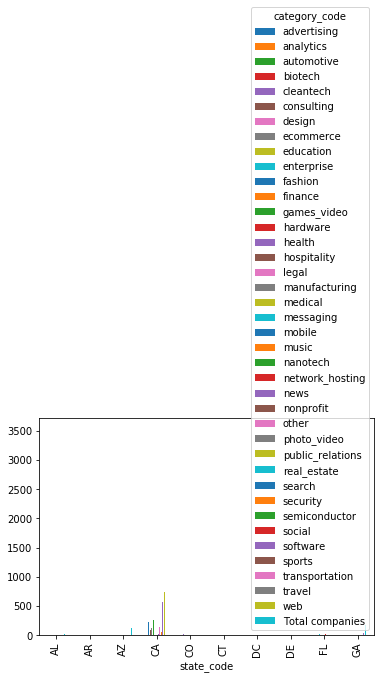

In [12]:
usa = pd.crosstab(companies_usa['category_code'],margins = True, margins_name = "Total companies")

TypeError: crosstab() missing 1 required positional argument: 'columns'

In [13]:
companies_usa['total_money'] = companies_usa['total_money_raised'].str.extract(r"([-+]?\d*\.\d+|\d+)", expand=False).astype("f", copy=False)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [14]:
companies_usa.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9752 entries, 0 to 15915
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           9752 non-null   int64  
 1   company_name         9752 non-null   object 
 2   address1             8354 non-null   object 
 3   address2             4019 non-null   object 
 4   city                 9394 non-null   object 
 5   state_code           9513 non-null   object 
 6   country_code         9752 non-null   object 
 7   latitude             7250 non-null   float64
 8   longitude            7250 non-null   float64
 9   name                 9752 non-null   object 
 10  category_code        9276 non-null   object 
 11  number_of_employees  5048 non-null   float64
 12  total_money_raised   9752 non-null   object 
 13  total_money          9752 non-null   float32
dtypes: float32(1), float64(3), int64(1), object(9)
memory usage: 1.1+ MB


In [15]:
companies_usa['total_money2'] = np.where(companies_usa['total_money_raised'].str.contains('M'),
                                       companies_usa['total_money']*1000000,np.where(companies_usa['total_money_raised'].str.contains('K'),
                                                                                    companies_usa['total_money']*1000),np.where(companies_usa['total_money_raised'].str.contains('B'),
                                                                                                                               companies_usa['total_money']*1000000000,companies_usa['total_money']*1))

ValueError: either both or neither of x and y should be given

In [16]:
def money(x):
    try:
        if 'B' in x:
            return 1000000000
        elif 'M' in x:
            return 1000000
        elif 'k' in x:
            return 1000
        else:
            return 1
    except:
        return 0

In [90]:
money('39.90M')

1000000

In [17]:
companies_usa['total_money2'] = companies_usa['total_money_raised'].apply(lambda x: money(x))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [18]:
companies_usa['total_money2'].value_counts()

1             5914
1000000       3408
1000           418
1000000000      12
Name: total_money2, dtype: int64

In [103]:
companies_usa[companies_usa['total_money_raised'].str.contains('k')]

,Unnamed: 0,company_name,address1,address2,city,state_code,country_code,latitude,longitude,name,category_code,number_of_employees,total_money_raised,total_money,total_money2
81,85,CriticalMetrics,NaN,NaN,NaN,CA,USA,37.269175,-119.306607,CriticalMetrics,web,4.0,$100k,100.0,1
107,111,Spotplex,"3160 De La Cruz Blvd., #202",NaN,Santa Clara,CA,USA,37.380101,-121.940749,Spotplex,web,3.0,$450k,450.0,1
114,118,Zooomr,NaN,NaN,San Francisco,CA,USA,37.775196,-122.419204,Zooomr,web,NaN,$50k,50.0,1
277,281,IceRocket,NaN,NaN,Dallas,TX,USA,32.781078,-96.797111,IceRocket,search,NaN,$300k,300.0,1
350,354,IntenseDebate,NaN,NaN,Boulder,CO,USA,40.010492,-105.276843,IntenseDebate,web,4.0,$515k,515.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15678,17981,Pipit Interactive,1014 Amherst Ave.,NaN,Los Angeles,CA,USA,34.045499,-118.470360,Pipit Interactive,ecommerce,10.0,$900k,900.0,1
15822,18126,Email Data Source,"65 Broadway, Suite 601",NaN,New York,NY,USA,40.707158,-74.012163,Email Data Source,NaN,NaN,$552k,552.0,1
15827,18131,Vertro,143 Varick Street,NaN,New York,NY,USA,40.726160,-74.006023,Vertro,software,50.0,$250k,250.0,1
15828,18132,Vertro,5200 Summerlin Commons Blvd.,Suite 500,Fort Myers,FL,USA,26.579494,-81.879319,Vertro,software,50.0,$250k,250.0,1


In [19]:
companies_usa['total_money'] = companies_usa['total_money']*companies_usa['total_money2']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
companies_usa['total_money'].mean()

16627754.937277265

In [21]:
companies_usa['total_money'].head(20)

0     0.000000e+00
1     3.980000e+07
2     3.980000e+07
3     0.000000e+00
4     4.500000e+07
6     1.650000e+07
7     0.000000e+00
8     0.000000e+00
9     0.000000e+00
10    1.810000e+07
11    2.580000e+07
12    7.310000e+07
13    4.420000e+07
14    1.850000e+07
15    1.850000e+07
16    0.000000e+00
17    5.580000e+06
18    1.160000e+09
19    2.430000e+09
21    2.430000e+09
Name: total_money, dtype: float64

In [22]:
usa_r = companies_usa[companies_usa['total_money']>1000]

In [23]:
usa_r.reset_index(inplace = True)

In [24]:
usa_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3837 entries, 0 to 3836
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                3837 non-null   int64  
 1   Unnamed: 0           3837 non-null   int64  
 2   company_name         3837 non-null   object 
 3   address1             3484 non-null   object 
 4   address2             1862 non-null   object 
 5   city                 3755 non-null   object 
 6   state_code           3771 non-null   object 
 7   country_code         3837 non-null   object 
 8   latitude             2928 non-null   float64
 9   longitude            2928 non-null   float64
 10  name                 3837 non-null   object 
 11  category_code        3794 non-null   object 
 12  number_of_employees  1863 non-null   float64
 13  total_money_raised   3837 non-null   object 
 14  total_money          3837 non-null   float64
 15  total_money2         3837 non-null   i

In [25]:
n = pd.pivot_table(companies_usa, index = ['state_code'],values = 'total_money',
                  columns = ['category_code'], aggfunc = np.sum, margins = True )

In [26]:
n.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, AL to All
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   advertising       42 non-null     float64
 1   analytics         16 non-null     float64
 2   automotive        4 non-null      float64
 3   biotech           36 non-null     float64
 4   cleantech         35 non-null     float64
 5   consulting        38 non-null     float64
 6   design            4 non-null      float64
 7   ecommerce         37 non-null     float64
 8   education         19 non-null     float64
 9   enterprise        37 non-null     float64
 10  fashion           5 non-null      float64
 11  finance           12 non-null     float64
 12  games_video       34 non-null     float64
 13  hardware          31 non-null     float64
 14  health            11 non-null     float64
 15  hospitality       6 non-null      float64
 16  legal             18 non-null     float64
 17  ma

In [130]:
tec_usa = n[['web','software','search','network_hosting','nanotech','mobile',
            'hardware','ecommerce','biotech','cleantech','analytics']]

In [138]:
tec_usa['network_hosting'].sum()

10215751980.201721

In [27]:
m = pd.pivot_table(companies_usa, index = ['category_code'],values = 'total_money', aggfunc = np.sum )

In [28]:
x = m.total_money.sort_values().tail(20)


In [29]:
import plotly.express as px

fig = px.pie(m, values=x, names=x.index, title='Total money raised for  typeinsduntry')
fig.show()

In [176]:
data = [dict(type = 'choropleth', locations = estados, z = usa['ecommerce']
             , locationmode = 'USA-states', text = 'numero de empresas',
            marker = dict(line = dict(color = 'rgb(255,255,255)', width = 2) ), colorbar = dict(title = 'avistamientos por estado'))]
estetica = dict(title = 'numero de empresas de ecommerce', geo = dict(scope = 'usa', projection = dict(type = 'albers usa'), showlakes = True, 
                                                              lakecolor = 'rgb(100,255,255)'))
fig = go.Figure(data = data, layout = estetica)
py.iplot(fig)
#pendientes

In [178]:
companies_usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9752 entries, 0 to 15915
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           9752 non-null   int64  
 1   company_name         9752 non-null   object 
 2   address1             8354 non-null   object 
 3   address2             4019 non-null   object 
 4   city                 9394 non-null   object 
 5   state_code           9513 non-null   object 
 6   country_code         9752 non-null   object 
 7   latitude             7250 non-null   float64
 8   longitude            7250 non-null   float64
 9   name                 9752 non-null   object 
 10  category_code        9276 non-null   object 
 11  number_of_employees  5048 non-null   float64
 12  total_money_raised   9752 non-null   object 
 13  total_money          9752 non-null   float64
 14  total_money2         9752 non-null   int64  
dtypes: float64(4), int64(2), object(9)
me

In [179]:
usa_ecom = companies_usa[companies_usa['category_code']=='ecommerce']

In [180]:
usa_ecom

,Unnamed: 0,company_name,address1,address2,city,state_code,country_code,latitude,longitude,name,category_code,number_of_employees,total_money_raised,total_money,total_money2
85,89,Wize,1110 Burlingame Ave,Suite 300,Burlingame,CA,USA,37.559287,-122.302262,Wize,ecommerce,NaN,$4.99M,4.990000e+06,1000000
145,149,TheFind,310 Villa Street,NaN,Mountain View,CA,USA,37.391502,-122.073463,TheFind,ecommerce,NaN,$26M,2.600000e+07,1000000
147,151,Zazzle,1800 Seaport,NaN,Redwood City,CA,USA,37.510854,-122.201356,Zazzle,ecommerce,NaN,$46M,4.600000e+07,1000000
235,239,Edgeio,654 High Street,#200,Palo Alto,CA,USA,37.443058,-122.161674,Edgeio,ecommerce,NaN,$6.5M,6.500000e+06,1000000
238,242,Kaboodle,640 W. California Ave.,Suite 220,Sunnyvale,CA,USA,37.382162,-122.036301,Kaboodle,ecommerce,NaN,$5M,5.000000e+06,1000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15781,18085,Top Rated Website Designers,NaN,NaN,Carlsbad,CA,USA,33.141212,-117.320512,Top Rated Website Designers,ecommerce,40.0,$0,0.000000e+00,1
15782,18086,Top Rated Website Designers,NaN,NaN,Los Angeles,CA,USA,33.993326,-118.398784,Top Rated Website Designers,ecommerce,40.0,$0,0.000000e+00,1
15783,18087,Top Rated Website Designers,NaN,NaN,San Diego,CA,USA,33.141212,-117.320512,Top Rated Website Designers,ecommerce,40.0,$0,0.000000e+00,1
15798,18102,EscapeHomes,3801 South Capital of Texas Highway,Suite 150,Austin,TX,USA,NaN,NaN,EscapeHomes,ecommerce,NaN,$0,0.000000e+00,1


In [181]:
usa_ecom = pd.pivot_table(usa_ecom, index = ['state_code'],
                values = ['number_of_employees'],
                aggfunc = {'number_of_employees':np.mean}) 

In [182]:
usa_ecom

,number_of_employees
state_code,
AZ,43.857143
CA,71.842857
CO,80.571429
CT,128.333333
DC,1.000000
FL,374.266667
GA,21.250000
IL,57.166667
KS,5.000000


In [185]:
data = [dict(type = 'choropleth', locations = estados, z = usa_ecom['number_of_employees']
             , locationmode = 'USA-states', text = 'numero de empleados promedio',
            marker = dict(line = dict(color = 'rgb(255,255,255)', width = 2) ), colorbar = dict(title = 'avistamientos por estado'))]
estetica = dict(title = 'numero de empleados promedio', geo = dict(scope = 'usa', projection = dict(type = 'albers usa'), showlakes = True, 
                                                              lakecolor = 'rgb(100,255,255)'))
fig = go.Figure(data = data, layout = estetica)
py.iplot(fig)
#pendientes

In [187]:
#pip install dash

     |████████████████████████████████| 75 kB 263 kB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 3.5 MB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 188 kB 5.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.8 MB 6.7 MB/s eta 0:00:01
     |████████████████████████████████| 421 kB 7.0 MB/s eta 0:00:01
  Created wheel for dash: filename=dash-1.17.0-py3-none-any.whl size=83726 sha256=175f2c2e1441740969e61ddcd5587e6715080420c854c13551ba952248e6b81b
  Stored in directory: /Users/macbookair13/Library/Caches/pip/wheels/28/60/30/2f9f3884e6c75ea2588026586e6b1a6e95922d7369ce2c8dba
  Created wheel for flask-compress: filename=Flask_Compress-1.8.0-py3-none-any.whl size=7215 sha256=401a83966871fa16f990ee3448e1619204de1e63fee10e15f6135c6552d0cec9
  Stored in directory: /Users/macbookair13/Library/Caches/pip/wheels/4e/1c/61/313684508e5fd5d7161332bc55fcfcb2cd2bc233c36a31b936
  Created wheel for das

In [1]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objs as go
from dash.dependencies import Input,Output

In [38]:
external_styleshsheets = ['https://codeopen.io/chriddyp/pen/bWLwgP.css']
tickFont = {'size':9,'color':'rgb(30,30,30)'}
options = [{'label':c, 'value':c} for c in estados]

In [51]:
usa['state'] = usa.index

In [53]:
usa[usa['state']=='CA']

category_code,advertising,analytics,automotive,biotech,cleantech,consulting,design,ecommerce,education,enterprise,...,security,semiconductor,social,software,sports,transportation,travel,web,Total companies,state
state_code,,,,,,,,,,,,,,,,,,,,,
CA,227,27,5,100,79,96,1,116,6,198,...,57,79,18,566,4,4,4,743,3546,CA


In [63]:
def update_bar_chart(selected_state):
    filtered = usa[usa['state']==selected_state]
    fig = go.Figure(data = [go.Bar(name='Compañias',x = filtered['state'],
                        y = filtered[list(usa.columns[:-1])], marker_color = 'firebrick')])
    fig.update_layout(title= 'Companies {}'.format(selected_country)),
    xaxis = dict(tickangle=-90,ticktext = usa['state'], tickfont = tickfont, type = 'category')
    return fig

In [123]:
app = dash.Dash()
app.title = 'prueba1'

app.layout = html.Div([
    
    #header
    html.H1('probando dashboard'),
    #dropdown
    html.Div(
        
        dcc.Dropdown(
        id = 'states-picker',
        options = options,
        value = 'CA'),
        
    style = {'widht':'15%'}
    
    ),
    #plot
    dcc.Graph(
    id = 'type companies',
    config = {'displayModebar':False})
    
   
])#end layout
@app.callback(Output(component_id = 'type companies',component_property = 'figure'),
             [Input(component_id = 'states-picker',component_property = 'value')])

def graph_state(state):
    j = companies_usa.category_code[companies_usa['state_code']==state].value_counts()
    data = [go.Bar(
       x = j.index,
       y = j.values)]
    fig = go.Figure(data=data)
    return fig  
    
app.run_server()

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [09/Nov/2020 01:22:25] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [09/Nov/2020 01:22:26] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [09/Nov/2020 01:22:26] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [09/Nov/2020 01:22:26] "POST /_dash-update-component HTTP/1.1" 200 -


In [30]:
companies_usa

,Unnamed: 0,company_name,address1,address2,city,state_code,country_code,latitude,longitude,name,category_code,number_of_employees,total_money_raised,total_money,total_money2
0,0,AdventNet,4900 Hopyard Rd.,Suite 310,Pleasanton,CA,USA,37.692934,-121.904945,AdventNet,enterprise,600.0,$0,0.000000e+00,1
1,3,Wetpaint,710 - 2nd Avenue,Suite 1100,Seattle,WA,USA,47.603122,-122.333253,Wetpaint,web,47.0,$39.8M,3.980000e+07,1000000
2,4,Wetpaint,270 Lafayette Street,Suite 505,New York,NY,USA,40.723731,-73.996431,Wetpaint,web,47.0,$39.8M,3.980000e+07,1000000
3,7,Zoho,4900 Hopyard Rd,Suite 310,Pleasanton,CA,USA,37.692934,-121.904945,Zoho,software,1600.0,$0,0.000000e+00,1
4,8,Digg,135 Mississippi St,NaN,San Francisco,CA,USA,37.764726,-122.394523,Digg,news,60.0,$45M,4.500000e+07,1000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15909,18214,QSGI,400 Royal Palm Way,NaN,Palm Beach,FL,USA,26.705331,-80.041395,QSGI,software,164.0,$0,0.000000e+00,1
15910,18215,Willdan Group,2401 East Katella Avenue,Suite 300,Anaheim,CA,USA,33.806525,-117.882314,Willdan Group,other,385.0,$0,0.000000e+00,1
15913,18218,AfterLogic,P.O. Box 2096,NaN,Livingston,NJ,USA,40.793024,-74.323554,AfterLogic,software,NaN,$0,0.000000e+00,1
15914,18219,EnteGreat,1900 International Park Drive,Suite 200,Birmingham,AL,USA,33.407786,-86.761302,EnteGreat,enterprise,NaN,$0,0.000000e+00,1


In [59]:
usa[usa['state']=='CA']

category_code,advertising,analytics,automotive,biotech,cleantech,consulting,design,ecommerce,education,enterprise,...,security,semiconductor,social,software,sports,transportation,travel,web,Total companies,state
state_code,,,,,,,,,,,,,,,,,,,,,
CA,227,27,5,100,79,96,1,116,6,198,...,57,79,18,566,4,4,4,743,3546,CA


In [64]:
j = companies_usa.category_code[companies_usa['state_code']=='CA'].value_counts()

In [67]:
import plotly.graph_objs as go
data = [go.Bar(
   x = j.index,
   y = j.values
)]
fig = go.Figure(data=data)
fig.show()

In [68]:
def graph_state(state):
    j = companies_usa.category_code[companies_usa['state_code']==state].value_counts()
    data = [go.Bar(
       x = j.index,
       y = j.values)]
    fig = go.Figure(data=data)
    return fig.show()

In [70]:
graph_state('LA')

In [78]:
states = companies_usa['state_code'].unique()

In [85]:
states = list(states)

In [95]:
print(states)

['AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', nan, 'NV', 'TX', 'SC', 'RI', 'OK', 'TN', 'OH', 'OR', 'VA', 'PA', 'WY', 'WI', 'WV', 'WA', 'NY', 'VT', 'UT', 'SD']


In [117]:
fig = px.pie(m, values=y['total_money'].head(40), names=x['category_code'].head(40), title='Total money raised for industry')
fig.show()

In [108]:
companies_usa[['category_code','total_money']][companies_usa['state_code']=='CA'].sort_values(by = 'total_money',ascending=False)

,category_code,total_money
19,social,2.430000e+09
13015,manufacturing,1.770000e+09
18,social,1.160000e+09
7079,web,1.150000e+09
7080,web,1.150000e+09
...,...,...
6478,enterprise,0.000000e+00
6481,web,0.000000e+00
6482,web,0.000000e+00
6489,software,0.000000e+00


In [102]:
companies_usa['total_money']

0        0.000000e+00
1        3.980000e+07
2        3.980000e+07
3        0.000000e+00
4        4.500000e+07
             ...     
15909    0.000000e+00
15910    0.000000e+00
15913    0.000000e+00
15914    0.000000e+00
15915    0.000000e+00
Name: total_money, Length: 9752, dtype: float64

In [105]:
x = companies_usa[['category_code','total_money']][companies_usa['state_code']=='CA']

In [109]:
y = companies_usa[['category_code','total_money']][companies_usa['state_code']=='CA'].sort_values(by = 'total_money',ascending=False)

In [ ]:
fig = px.pie(m, values=y['total_money'].head(40), names=x['category_code'].head(40), title='Total money raised for industry')
fig.show()

In [118]:
def graph_state_pie(state):
    y = companies_usa[['category_code','total_money']][companies_usa['state_code']==state].sort_values(by = 'total_money',ascending=False)
    fig = px.pie(m, values=y['total_money'].head(40), names=x['category_code'].head(40), title='Total money raised for industry')
    return fig  

In [150]:
graph_state_pie('NY')

KeyError: 'outputs_list'

In [121]:
external_styleshsheets = ['https://codeopen.io/chriddyp/pen/bWLwgP.css']
tickFont = {'size':9,'color':'rgb(30,30,30)'}
options = [{'label':c, 'value':c} for c in estados]

In [122]:
app = dash.Dash()
app.title = 'prueba1'

app.layout = html.Div([
    
    #header
    html.H1('probando dashboard'),
    #dropdown
    html.Div(
        
        dcc.Dropdown(
        id = 'states-picker',
        options = options,
        value = 'CA'),
        
    style = {'widht':'15%'}
    
    ),
    #plot
    dcc.Graph(
    id = 'type companies',
    config = {'displayModebar':False})
    
   
])#end layout
@app.callback(Output(component_id = 'type companies',component_property = 'figure'),
             [Input(component_id = 'states-picker',component_property = 'value')])

def graph_state_pie(state):
    y = companies_usa[['category_code','total_money']][companies_usa['state_code']==state].sort_values(by = 'total_money',ascending=False)
    fig = px.pie(m, values=y['total_money'].head(40), names=x['category_code'].head(40), title='Total money raised for industry')
    return fig 
    
app.run_server()

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [09/Nov/2020 01:20:23] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [09/Nov/2020 01:20:23] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [09/Nov/2020 01:20:23] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [09/Nov/2020 01:20:23] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [09/Nov/2020 01:20:24] "GET /_dash-component-suites/dash_core_components/async-plotlyjs.v1_13_0m1604001894.js HTTP/1.1" 200 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "/opt/anaconda3/lib/python3.7/site-packages/dash/dash.py", line 1076, in dispatch
    response.set_d

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "/opt/anaconda3/lib/python3.7/site-packages/dash/dash.py", line 1076, in dispatch
    response.set_d

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "/opt/anaconda3/lib/python3.7/site-packages/dash/dash.py", line 1076, in dispatch
    response.set_d

127.0.0.1 - - [09/Nov/2020 01:20:31] "POST /_dash-update-component HTTP/1.1" 500 -
127.0.0.1 - - [09/Nov/2020 01:20:37] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [09/Nov/2020 01:20:48] "POST /_dash-update-component HTTP/1.1" 200 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "/opt/anaconda3/lib/python3.7/site-packages/dash/dash.py", line 1076, in dispatch
    response.set_d

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "/opt/anaconda3/lib/python3.7/site-packages/dash/dash.py", line 1076, in dispatch
    response.set_d

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "/opt/anaconda3/lib/python3.7/site-packages/dash/dash.py", line 1076, in dispatch
    response.set_d

127.0.0.1 - - [09/Nov/2020 01:20:54] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "/opt/anaconda3/lib/python3.7/site-packages/dash/dash.py", line 1076, in dispatch
    response.set_d

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "/opt/anaconda3/lib/python3.7/site-packages/dash/dash.py", line 1076, in dispatch
    response.set_d

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "/opt/anaconda3/lib/python3.7/site-packages/dash/dash.py", line 1076, in dispatch
    response.set_d

127.0.0.1 - - [09/Nov/2020 01:20:57] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "/opt/anaconda3/lib/python3.7/site-packages/dash/dash.py", line 1076, in dispatch
    response.set_d

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "/opt/anaconda3/lib/python3.7/site-packages/dash/dash.py", line 1076, in dispatch
    response.set_d

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "/opt/anaconda3/lib/python3.7/site-packages/dash/dash.py", line 1076, in dispatch
    response.set_d

127.0.0.1 - - [09/Nov/2020 01:21:06] "POST /_dash-update-component HTTP/1.1" 500 -
127.0.0.1 - - [09/Nov/2020 01:21:10] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [09/Nov/2020 01:21:28] "POST /_dash-update-component HTTP/1.1" 200 -


In [127]:
companies = companies_usa['category_code'].unique()

In [142]:
usa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, AL to Total companies
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   advertising       51 non-null     int64 
 1   analytics         51 non-null     int64 
 2   automotive        51 non-null     int64 
 3   biotech           51 non-null     int64 
 4   cleantech         51 non-null     int64 
 5   consulting        51 non-null     int64 
 6   design            51 non-null     int64 
 7   ecommerce         51 non-null     int64 
 8   education         51 non-null     int64 
 9   enterprise        51 non-null     int64 
 10  fashion           51 non-null     int64 
 11  finance           51 non-null     int64 
 12  games_video       51 non-null     int64 
 13  hardware          51 non-null     int64 
 14  health            51 non-null     int64 
 15  hospitality       51 non-null     int64 
 16  legal             51 non-null     int64 
 17  manufactu

In [128]:
companies

array(['enterprise', 'web', 'software', 'news', 'games_video', 'music',
       'mobile', 'social', 'search', 'advertising', 'security',
       'photo_video', 'finance', 'network_hosting', 'ecommerce',
       'hardware', 'messaging', 'travel', 'public_relations',
       'real_estate', 'other', 'semiconductor', 'analytics', 'health',
       'legal', 'sports', 'biotech', 'cleantech', 'education',
       'consulting', 'transportation', 'fashion', 'hospitality',
       'nonprofit', 'nanotech', 'automotive', nan, 'design',
       'manufacturing', 'medical'], dtype=object)

In [126]:
data = [dict(type = 'choropleth', locations = estados, z = usa['ecommerce']
             , locationmode = 'USA-states', text = 'numero de empresas',
            marker = dict(line = dict(color = 'rgb(255,255,255)', width = 2) ), colorbar = dict(title = 'avistamientos por estado'))]
estetica = dict(title = 'numero de empresas de ecommerce', geo = dict(scope = 'usa', projection = dict(type = 'albers usa'), showlakes = True, 
                                                              lakecolor = 'rgb(100,255,255)'))
fig = go.Figure(data = data, layout = estetica)
py.iplot(fig)

In [129]:
external_styleshsheets = ['https://codeopen.io/chriddyp/pen/bWLwgP.css']
tickFont = {'size':9,'color':'rgb(30,30,30)'}
options2 = [{'label':c, 'value':c} for c in companies]

In [165]:
app = dash.Dash()
app.title = 'prueba3'

app.layout = html.Div([
    
    #header
    html.H1('probando dashboard'),
    #dropdown
    html.Div(
        
        dcc.Dropdown(
        id = 'companies-picker',
        options = options2,
        value = 'web'),
        
    style = {'widht':'15%'}
    
    ),
    #plot
    dcc.Graph(
    id = 'type companies',
    config = {'displayModebar':False})
    
   
])#end layout
@app.callback(Output(component_id = 'type companies',component_property = 'figure'),
             [Input(component_id = 'companies-picker',component_property = 'value')])

def graph_state_us(c):
    data = [dict(type = 'choropleth', locations = estados, z = usa[c]
             , locationmode = 'USA-states', text = 'numero de empresas',
            marker = dict(line = dict(color = 'rgb(255,255,255)', width = 2) ), colorbar = dict(title = 'empresas por estado'))]
    estetica = dict(title = 'numero de empresas de {}'.format(c), geo = dict(scope = 'usa', projection = dict(type = 'albers usa'), showlakes = True, 
                                                              lakecolor = 'rgb(100,255,255)'))
    fig = go.Figure(data = data, layout = estetica)
    return fig
    
app.run_server()

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


OSError: [Errno 48] Address already in use

In [144]:
def graph_state_us(c):
    data = [dict(type = 'choropleth', locations = estados, z = usa[c]
             , locationmode = 'USA-states', text = 'numero de empresas',
            marker = dict(line = dict(color = 'rgb(255,255,255)', width = 2) ), colorbar = dict(title = 'empresas por estado'))]
    estetica = dict(title = 'numero de empresas de {}'.format(c), geo = dict(scope = 'usa', projection = dict(type = 'albers usa'), showlakes = True, 
                                                              lakecolor = 'rgb(100,255,255)'))
    fig = go.Figure(data = data, layout = estetica)
    return fig

In [145]:
graph_state_us('web')

In [147]:
companies_usa.to_csv('companies_usa.csv', index = False)
usa.to_csv('usa.csv',index = False)

In [149]:
len(estados)

51

In [158]:
fig = px.scatter_mapbox(g, lat="latitude", lon="longitude", hover_name="city", hover_data=["state_code", "name"],
                        color_discrete_sequence=["blue"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [157]:
g = companies_usa[companies_usa["category_code"]=='web']

In [160]:
def mapa_cat_state(cat):
    g = companies_usa[companies_usa["category_code"]==cat]
    fig = px.scatter_mapbox(g, lat="latitude", lon="longitude", hover_name="city", hover_data=["state_code", "name"],
                        color_discrete_sequence=["blue"], zoom=3, height=300)
    fig.update_layout(mapbox_style="open-street-map")
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    return fig
    

In [167]:
external_styleshsheets = ['https://codeopen.io/chriddyp/pen/bWLwgP.css']
tickFont = {'size':9,'color':'rgb(30,30,30)'}
options3 = [{'label':c, 'value':c} for c in companies]

In [168]:
app = dash.Dash()
app.title = 'prueba4'

app.layout = html.Div([
    
    #header
    html.H1('probando dashboard'),
    #dropdown
    html.Div(
        
        dcc.Dropdown(
        id = 'companies-picker',
        options = options3,
        value = 'web'),
        
    style = {'widht':'15%'}
    
    ),
    #plot
    dcc.Graph(
    id = 'type companies',
    config = {'displayModebar':False})
    
   
])#end layout
@app.callback(Output(component_id = 'type companies',component_property = 'figure'),
             [Input(component_id = 'companies-picker',component_property = 'value')])

def mapa_cat_state(cat):
    g = companies_usa[companies_usa["category_code"]==cat]
    fig = px.scatter_mapbox(g, lat="latitude", lon="longitude", hover_name="city", hover_data=["state_code", "name"],
                        color_discrete_sequence=["blue"], zoom=3, height=300)
    fig.update_layout(mapbox_style="open-street-map")
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    return fig
    
app.run_server()

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


OSError: [Errno 48] Address already in use

In [164]:
companies

array(['enterprise', 'web', 'software', 'news', 'games_video', 'music',
       'mobile', 'social', 'search', 'advertising', 'security',
       'photo_video', 'finance', 'network_hosting', 'ecommerce',
       'hardware', 'messaging', 'travel', 'public_relations',
       'real_estate', 'other', 'semiconductor', 'analytics', 'health',
       'legal', 'sports', 'biotech', 'cleantech', 'education',
       'consulting', 'transportation', 'fashion', 'hospitality',
       'nonprofit', 'nanotech', 'automotive', nan, 'design',
       'manufacturing', 'medical'], dtype=object)

In [2]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options
df_bar = pd.DataFrame({
    "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
    "Amount": [4, 1, 2, 2, 4, 5],
    "City": ["SF", "SF", "SF", "Montreal", "Montreal", "Montreal"]
})

fig = px.bar(df_bar, x="Fruit", y="Amount", color="City", barmode="group")

app.layout = html.Div(children=[
    # All elements from the top of the page
    html.Div([
        html.H1(children='Hello Dash'),

        html.Div(children='''
            Dash: A web application framework for Python.
        '''),

        dcc.Graph(
            id='graph1',
            figure=fig
        ),  
    ]),
    # New Div for all elements in the new 'row' of the page
    html.Div([
        html.H1(children='Hello Dash'),

        html.Div(children='''
            Dash: A web application framework for Python.
        '''),

        dcc.Graph(
            id='graph2',
            figure=fig
        ),  
    ]),
])

if __name__ == '__main__':
    app.run_server()

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
